# Sklearn

## sklearn.linear_model

Теперь мы будем строить модели регрессии. Для начала импортируем необходимые нам модули.

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split, cross_val_score

import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

### Линейная регрессия

#### Генерация данных

Теперь сгенерируем данные для обучения. Так как мы решаем задачу регрессии, нам очень подойдет функция **make_regression**. Она позволяет построить соответствующий *dataset*. В данном случае мы будем строить *dataset* с двумя признаками. Пускай один из них будет информативным, другой будет избыточным. Также добавим некоторый шум. Еще один параметр, который мы укажем, это параметр *coef = True*. Он нужен для того, чтобы мы могли с вами посмотреть на уравнение функции, которую мы приближаем. То есть мы попросим метод вернуть нам не только данные и метки, но и также уравнение. 

In [3]:
data, target, coef = datasets.make_regression(n_features = 2, 
                    n_informative = 1, n_targets = 1, noise = 5., 
                    coef = True, random_state = 2)

Теперь давайте попробуем отрисовать наш *dataset*.

Отобразим объекты в плоскости «признаки–метки», таким образом мы сможем понять, есть ли какая-то зависимость между значением признаков и значением целевой метки. Сначала мы построим объекты в плоскости «нулевой признак–целевая метка», отрисуем их красным цветом, а потом мы построим те же самые объекты в плоскости «первый признак–метка» и отрисуем их синим цветом. Так как пространство значения признаков у нас совпадает, мы можем сделать это на одном графике. 

In [4]:
X0 = data[:, 0]
X1 = data[:, 1]

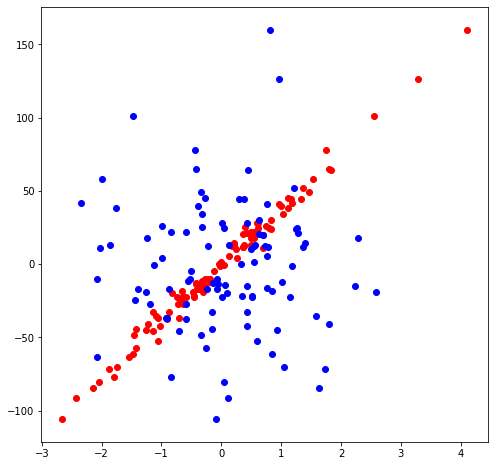

In [5]:
plt.figure(figsize=(8, 8))
plt.scatter(X0, target, color = 'r')
plt.scatter(X1, target, color = 'b')

По этому графику легко проанализировать и понять, какой же из двух признаков является информативным. Нулевой признак отображен точками красного цвета. Мы видим, что в основном с увеличением значения признака у нас растет *target*. Таким образом, понятно, что зависимость между этим признаком и целевой переменной есть. С другой стороны, давайте посмотрим на синие точки (это второй признак). Мы видим, что, в общем-то, изменение этого признака, например его рост, не всегда означает рост целевой функции. У нас в этом случае есть некоторые случайные изменения, поэтому понятно, что этот признак не настолько информативен.

Вот теперь давайте построим модель и посмотрим на коэффициенты между этими признаками. Понятно, что мы ожидаем больший коэффициент (по абсолютной величине) перед информативным признаком и меньший коэффициент по абсолютной величине перед избыточным признаком.

In [6]:
# Для того чтобы построить модель и оценить ее качество, 
# разобьем данные на обучение и тест.
train_data, test_data, train_labels, test_labels = train_test_split(data, 
                                                     target, test_size = 0.3)

#### LinearRegression

Воспользуемся классификатором **linear_regression**, обучим его на *train_data* и *train_labels* и получим наши *predictions* с помощью метода **predict**. 

In [7]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [8]:
# выведем исходные значения функции
print(test_labels)

[-13.99339669 -11.18242389 -36.69728864  17.64282734 -70.11132234
  78.24817537  13.31981235 -40.84204295 -16.30914909 -16.79027112
  22.2276832  -22.33224966  34.35183007 -37.31870104  27.83791274
 -36.44717565 101.14760598  13.02656201 -84.32102748 -26.87743177
 -18.57607726  38.36241814 -18.86438755  45.05465366 -22.64686884
 -16.65927231 -80.80239408  41.95683853 -48.28700118 -91.477377  ]


In [9]:
# выведем наше приближене функции на тестовых объектах
print(predictions)

[-15.25660377 -13.38170845 -27.75780849  21.2201442  -66.44976245
  65.32136812  14.01214581 -46.45957254 -12.36063017 -15.09570763
  17.96185725 -29.2232291   38.40063486 -35.3601797   22.63678363
 -41.42453986  95.64507832  18.23708453 -81.34252421 -28.39316243
 -25.25818443  40.66951608 -19.1383703   41.65380288 -17.8278491
 -15.02019329 -78.39083033  42.8668534  -56.22225586 -93.37224395]


Визуально довольно сложно оценить, насколько у нас хорошо получилось, лучше для этого использовать некоторую метрику. Будем использовать среднее отклонение нашего приближения от исходного значения функции. 

In [10]:
metrics.mean_absolute_error(test_labels, predictions)

3.978144927655784

Видим, что в среднем мы ошибаемся на 4. Давайте сделаем оценку чуть более точной и для этого воспользуемся функцией **cross_val_score**. Передадим в наш регрессор данные, целевую переменную. Скажем, что будем пользоваться метрикой *mean_absolute_error* (та же самая метрика, которой мы только что воспользовались): создадим scorer с помощью функции **make_scorer** и скажем, что для нашей метрики *greater_is_better=True*, то есть значение, когда наша метрика растет, это лучше. 

В данном случае в качества scoring мы передаем метрику, которая не растет, когда модель становится лучше, а которая уменьшается, когда модель становится лучше. А так как при подборе параметров часто используется максимизация нашей метрики, то нам просто удобно иногда умножить нашу метрику на (−1) и дальше ее точно так же максимизировать. А так как функция cross_val_score понимает, что функция mean_absolute_error растет, когда модель ухудшается, то нам действительно просто умножить эту функцию на (−1). В данном случае мы с вами подбор параметров не делаем, мы ничего не оптимизируем, поэтому, конечно, нам это неудобно. Чтобы от такого избавиться, мы можем создать свой собственный scorer.

Будем делать кросс-валидацию k-fold на 10 фолдов. Сразу же после этого выпишем среднее и отклонение по нашей метрике. 

In [15]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, 
                             greater_is_better = True)

In [16]:
linear_scoring = cross_val_score(linear_regressor, data, target, 
                                 scoring=scorer, cv = 10)
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: 4.070071498779697, std: 1.0737104492890193


Мы видим, что в среднем наша ошибка равна 4 с отклонением 1.

Посмотрим на коэффициенты нашей исходной функции. Мы их получили в самом начале, когда генерировали данные. Выведем эти коэффициенты. 

In [22]:
coef

array([38.07925837,  0.        ])

Видим, что коэффициент перед первым признаком равен 38 (это информативный признак) и перед вторым признаком признаком равен 0 (это избыточный признак). Теперь давайте посмотрим, какие же коэффициенты подобрала наша модель. 

In [23]:
linear_regressor.coef_

array([38.11214287,  0.28946295])

Ну да, видим, что ответ довольно близок к исходному. Давайте запишем это в виде уравнения, чтобы было более наглядно. 

In [24]:
# в лекции не указано, что в уравнении обученной модели
# также участвует свободный член
linear_regressor.intercept_

-0.5259918994241313

In [26]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [27]:
print("y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}".format(linear_regressor.coef_[0], 
                                                  linear_regressor.coef_[1], 
                                                  linear_regressor.intercept_))

y = 38.11*x1 + 0.29*x2 + -0.53


Ну вот уравнение нашей исходной функции (y — это, собственно, и есть target) и уравнение той функции, которую мы с вами обучили, которую мы с вами построили. Ну мы видим, что мы достаточно близки.

#### Lasso

Теперь давайте попробуем решить ту же самую задачу с помощью другого метода регрессии. Мы рассмотрим лассо-регрессию — регрессию с использованием регуляризации **lasso** или регуляризации **L1**. Давайте также построим модель, обучим ее на обучающих данных и и построим наше приближение. Делаем это с помощью функций *fit* и *predict* так же, как и раньше.

In [17]:
lasso_regressor = linear_model.Lasso(random_state = 3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

Сразу же оценим качество модели по кросс-валидации. Будем использовать тот же самый *scorer*, чтобы получить неотрицательное значение метрики. 

In [18]:
lasso_scoring = cross_val_score(lasso_regressor, data, target, 
                                scoring = scorer, cv = 10)
print('mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std()))

mean: 4.154478246666397, std: 1.0170354384993354


Видим, что качество стало немножечко хуже. Ну, понятно, что это не значимо, но тем не менее средняя ошибка немножечко больше. Теперь давайте выведем снова исходное уравнение и выведем уравнение, которое мы получили с помощью лассо-регрессии. 

In [32]:
print(lasso_regressor.coef_)

[36.9719441  0.       ]


In [33]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [36]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(lasso_regressor.coef_[0], 
                                         lasso_regressor.coef_[1]))

y = 36.97*x1 + 0.00*x2


Посмотрите. Отличие в том, что в данном случае перед неинформативным признаком мы получили 0. Здесь мы видим результат применения L1-регуляризации. На этом модельном примере очень хорошо видны особенности работы лассо-регуляризации. Мы видим, что у нас как будто бы произошел отбор признаков. Перед избыточным признаком мы получили вес 0. Таким образом, теперь вы знаете, что если в вашей задаче много избыточных признаков и вы хотите заняться отбором признаков, то есть вы хотите получить перед ними не просто маленькие веса, а действительно получить нули и отфильтровать такие признаки, то лассо-регуляризация очень хорошо подходит для этой задачи. 